# Matplotlib Pie Plots

Load in data.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

We'll subset this data to only Data Analysts so we have more meaningful insights.

In [2]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

## Pie Chart

### Notes

* `pie()`: plot a pie chart.
* Common parameters:
    * `y` - Column label or position. This is used to provide data points for the pie.
    * `labels` - Indexes to use for labeling the wedges with their corresponding data values.
    * `colors` - A list of colors to use for the different sections of the pie.
    * `autopct` - A string or function used to label the wedges with their numeric value. The label will be placed inside the wedge.
    * `startangle` - Rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
    * `explode` - An array which specifies the fraction of the radius with which to offset each wedge.
* Syntax: `plt.pie(df['data'], labels=df['category'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'yellow'], explode=(0.1, 0, 0, 0))`
* Chart shows how individual parts make up a whole.

### Example 1

Let's visualize the breakdown of jobs that let you work from home versus those that don't as a pie chart.

In [3]:
# Count True and False values
work_from_home = df['job_work_from_home'].value_counts()

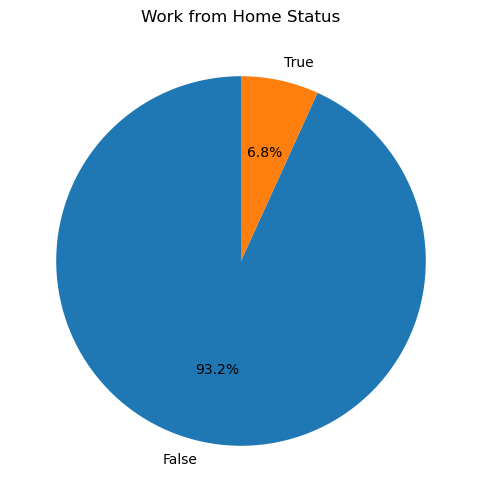

In [4]:
# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(work_from_home, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Work from Home Status')
plt.show()

### Example 2

Now let's create pie charts for these other boolean columns: `job_no_degree_mention` and `job_health_insurance`.

1. The `job_no_degree_mention` column.

In [5]:
# Count True and False values
job_no_degree = df['job_no_degree_mention'].value_counts()

2. The `job_health_insurance` column.

In [6]:
job_health_insurance = df['job_health_insurance'].value_counts()

3. Let's plot these two DataFrames this along side our `work_from_home` using `subplot()`.

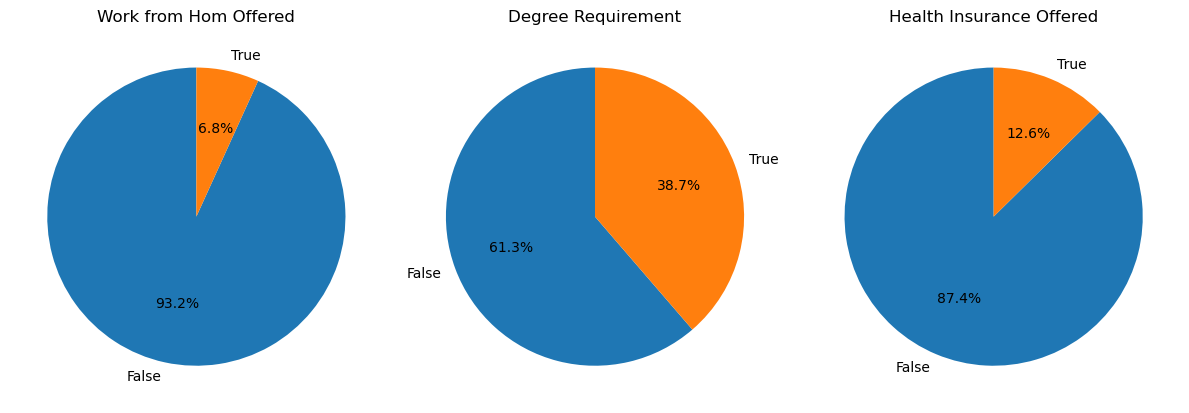

In [7]:
# Set up the matplotlib figure
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

# Data Analyst Salaries
plt.subplot(1, 3, 1)
plt.pie(work_from_home, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Work from Hom Offered')

# Job No Degree
plt.subplot(1, 3, 2)
plt.pie(job_no_degree, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Degree Requirement')

# Job Health Insurance
plt.subplot(1, 3, 3)
plt.pie(job_health_insurance, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Health Insurance Offered')

plt.tight_layout()
plt.show()

Alternatively, you can use a for loop for this.

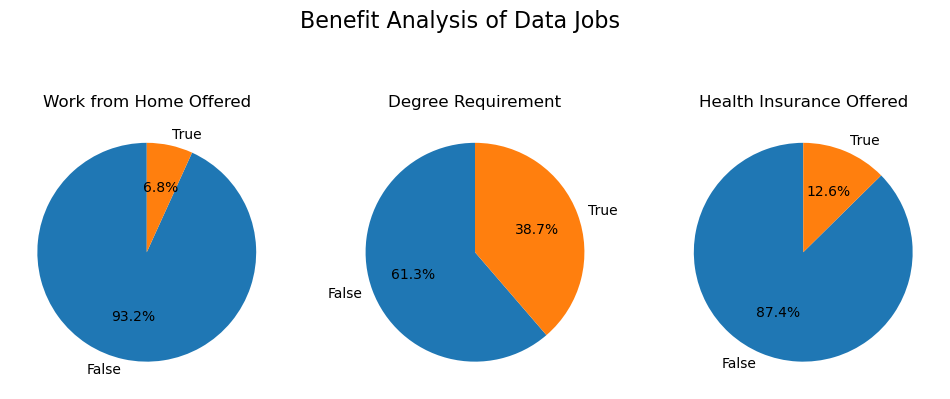

In [8]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()